In [18]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
%run "strategy.ipynb"

preperation complete!


In [45]:
bank = 5000000
new_bank = 5000000
count = 0
count_total = 0

# create new dataframe to store the results with cols dates blocks closing prices money 
results = pd.DataFrame(columns=['dates', 'blocks', 'closing_prices', 'money'])

for block in EURUSD_filtered["Block"].unique():
# for block in range(1, 2):
    print("Block", block)
    block_data = EURUSD_filtered[EURUSD_filtered["Block"] == block]
    mutex = 0
    for t in range(96, len(block_data)):
        count_total += 1
        # fit model to the last 96 closing prices of the block
        block_data_last_day = block_data.iloc[t-96:t]
        model, X, Y = fit_model(block_data_last_day)

        mutex, new_bank = revert_to_the_mean(block_data.iloc[t], model, X, Y, mutex, bank)
        if new_bank != bank:
            bank = new_bank
            # store the results in the results dataframe
            new_row = pd.DataFrame({
                'dates': [block_data.iloc[t]["Dates"]],  # Wrap scalar in list
                'blocks': [block],  # Wrap scalar in list
                'closing_prices': [block_data.iloc[t]["Close"]],  # Wrap scalar in list
                'money': [bank]  # Wrap scalar in list
            })
            results = pd.concat([results, new_row], ignore_index=True)
            # print(bank)


    if mutex == 1:
        new_bank = bank * (1/block_data.iloc[t]["Close"])
        # print("Sell", (1/block_data.iloc[t]["Close"]) * bank, "€", block_data.iloc[t]["Dates"], block_data.iloc[t]["Close"], "end of block")
        if new_bank != bank:
            bank = new_bank
            # store the results in the results dataframe
            new_row = pd.DataFrame({
                'dates': [block_data.iloc[t]["Dates"]],  # Wrap scalar in list
                'blocks': [block],  # Wrap scalar in list
                'closing_prices': [block_data.iloc[t]["Close"]],  # Wrap scalar in list
                'money': [bank]  # Wrap scalar in list
            })
            results = pd.concat([results, new_row], ignore_index=True)
        

Block 1
Block 2
Block 3
Block 4
Block 5
Block 6
Block 7
Block 8
Block 9
Block 10
Block 11
Block 12
Block 13
Block 14
Block 15
Block 16
Block 17
Block 18
Block 19
Block 20
Block 21
Block 22
Block 23
Block 24
Block 25
Block 26
Block 27
Block 28
Block 29


In [60]:
print("Percentage of closing prices outside the confidence interval:", len(results)/count_total)
print("Bank:", bank)
print("total loss:", 5000000 - bank)
print("Trades:", len(results))
print("average loss per trade:", (5000000 - bank)/len(results))
print("average loss per trade in percentage:", ((5000000 - bank)/len(results))/5000000*100, "%")

Percentage of closing prices outside the confidence interval: 0.05127241994553479
Bank: 4943978.478045991
total loss: 56021.52195400931
Trades: 546
average loss per trade: 102.60352006228811
average loss per trade in percentage: 0.002052070401245762 %


In [47]:
results.tail()

,dates,blocks,closing_prices,money
541,2024-04-17 03:15:00,29,1.0628,4.945374e+06
542,2024-04-17 03:30:00,29,1.0625,5.254460e+06
543,2024-04-17 03:45:00,29,1.0628,4.943978e+06
544,2024-04-17 06:30:00,29,1.0625,5.252977e+06
545,2024-04-17 08:30:00,29,1.0625,4.943978e+06


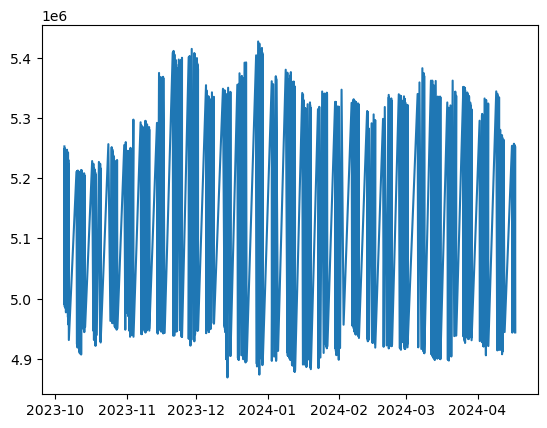

In [48]:
# plot the results
plt.plot(results['dates'], results['money'])


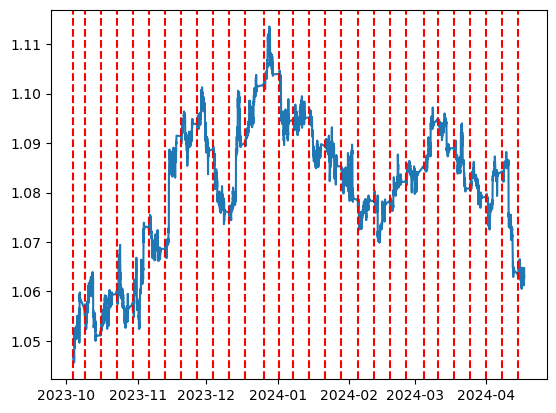

In [19]:
# plot all closing prices against the dates
plt.plot(EURUSD_filtered["Dates"], EURUSD_filtered["Close"])
# since there are jumps in the seperate each block by a vertical red line
for block in EURUSD_filtered["Block"].unique():
    block_data = EURUSD_filtered[EURUSD_filtered["Block"] == block]
    plt.axvline(x=block_data.iloc[0]["Dates"], color='r', linestyle='--')

# plot the money against the dates in green


In [49]:
# make a subset of every second entry in the results dataframe to plot the trades
results_subset = results.iloc[::2, :]
# and the complimentary subset for the money
results_subset_compl = results.iloc[1::2, :]


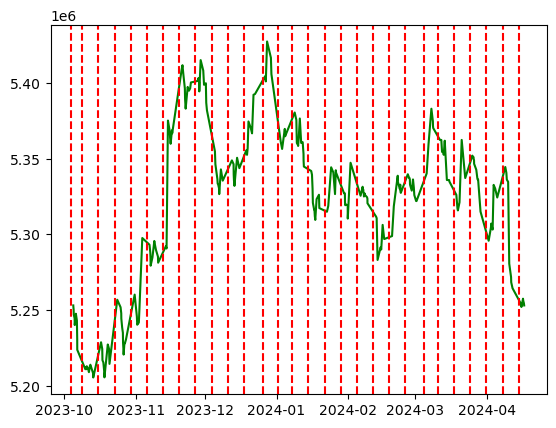

In [52]:
# for the results_subset plot the money against the dates
plt.plot(results_subset["dates"], results_subset["money"], 'g') 
for block in EURUSD_filtered["Block"].unique():
    block_data = EURUSD_filtered[EURUSD_filtered["Block"] == block]
    plt.axvline(x=block_data.iloc[0]["Dates"], color='r', linestyle='--')

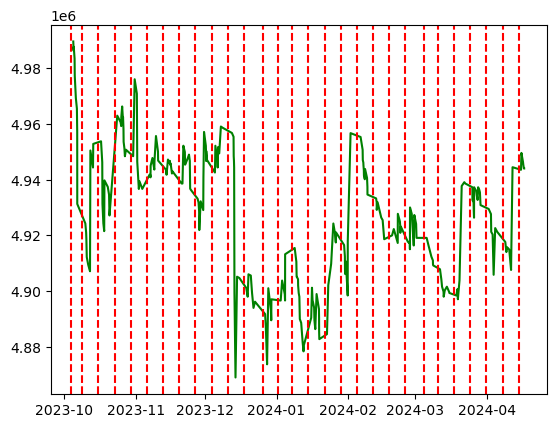

In [55]:
# for the results_subset_compl plot the trades against the dates
plt.plot(results_subset["dates"], results_subset_compl["money"], 'g')
for block in EURUSD_filtered["Block"].unique():
    block_data = EURUSD_filtered[EURUSD_filtered["Block"] == block]
    plt.axvline(x=block_data.iloc[0]["Dates"], color='r', linestyle='--')


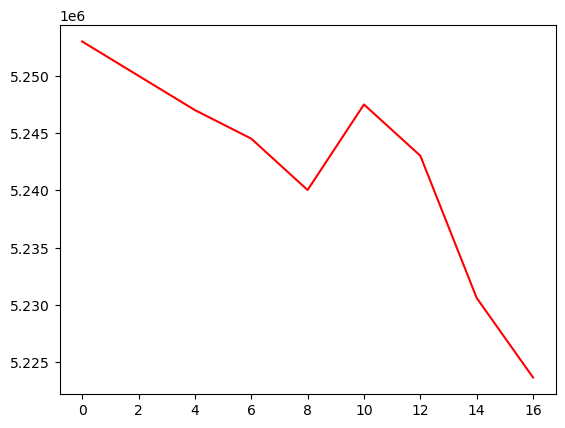

In [25]:
# only select block 1 trades from the results_subset
results_subset_block1 = results_subset[results_subset["blocks"] == 1]
# plot money against indext for block 1
plt.plot(results_subset_block1.index, results_subset_block1["money"], 'r')